In [ ]:
import pandas as pd
import numpy as np
import cv2
import csv
import glob
import matplotlib.pyplot as plt

#Generate training dataset from images, and storing the values in training_dataset.csv

In [ ]:
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))

with open('training_dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("/content/drive/MyDrive/Assignment/ML Assignment/train/"+str(label)+"/*.bmp")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               data.append(k)
       with open('training_dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
 


#Generate test dataset from images, and storing the values in training_dataset.csv

In [ ]:

import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))

with open('testing_dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("/content/drive/MyDrive/Assignment/ML Assignment/val/"+str(label)+"/*.tiff")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               data.append(k)
       with open('testing_dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [ ]:
#load the dataset
training_data  =pd.read_csv('training_dataset.csv')
training_data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
158,1,180,173,158,138,117,98,84,77,75,...,82,87,95,108,123,142,161,179,192,197
137,1,98,92,81,67,55,49,48,53,61,...,219,236,246,252,254,255,255,255,255,255
252,2,148,144,135,125,118,114,109,104,99,...,230,222,208,189,168,145,122,103,89,83
733,7,243,242,236,229,220,210,198,183,171,...,230,241,248,252,254,255,255,255,255,255
541,5,92,90,85,83,85,91,99,114,134,...,239,222,196,162,135,124,129,148,169,179


In [ ]:
X_Train = training_data.drop(["label"],axis=1).values
Y_Train = training_data["label"].values

In [ ]:
X_Train

array([[248, 244, 234, ..., 234, 242, 246],
       [242, 237, 225, ..., 180, 194, 202],
       [248, 244, 238, ..., 236, 243, 246],
       ...,
       [255, 255, 255, ...,  83,  82,  83],
       [255, 255, 255, ...,  75,  73,  73],
       [242, 243, 245, ..., 168, 187, 196]])

In [ ]:
testing_data  =pd.read_csv('testing_dataset.csv')
testing_data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
56,3,162,161,158,157,157,160,164,168,170,...,248,240,228,208,187,166,149,139,134,134
71,4,176,169,154,140,136,145,165,194,218,...,235,245,250,253,254,255,255,255,255,255
144,8,56,62,77,101,134,170,202,229,243,...,85,85,85,85,85,85,85,85,85,85
35,2,86,89,98,109,121,131,138,143,144,...,253,250,243,227,205,176,145,117,97,89
26,1,133,127,116,103,94,88,87,87,86,...,129,141,156,174,190,205,217,226,232,234


In [ ]:
X_Test = testing_data.drop(["label"],axis=1).values
Y_Test = testing_data["label"].values

In [ ]:
len(X_Train),len(Y_Train),len(X_Test),len(Y_Test)

(1010, 1010, 158, 158)

In [ ]:
X_Train_scaled = X_Train.copy()
X_Train_scaled = X_Train_scaled / 255

X_Test_scaled = X_Test.copy()
X_Test_scaled = X_Test_scaled / 255

In [ ]:
X_Train_scaled

array([[0.97254902, 0.95686275, 0.91764706, ..., 0.91764706, 0.94901961,
        0.96470588],
       [0.94901961, 0.92941176, 0.88235294, ..., 0.70588235, 0.76078431,
        0.79215686],
       [0.97254902, 0.95686275, 0.93333333, ..., 0.9254902 , 0.95294118,
        0.96470588],
       ...,
       [1.        , 1.        , 1.        , ..., 0.3254902 , 0.32156863,
        0.3254902 ],
       [1.        , 1.        , 1.        , ..., 0.29411765, 0.28627451,
        0.28627451],
       [0.94901961, 0.95294118, 0.96078431, ..., 0.65882353, 0.73333333,
        0.76862745]])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_Train_scaled, Y_Train, epochs=6)

Epoch 1/6
32/32 [==============================] - 1s 4ms/step - loss: 1.6243 - accuracy: 0.5277
Epoch 2/6
32/32 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.8426
Epoch 3/6
32/32 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.8911
Epoch 4/6
32/32 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.9069
Epoch 5/6
32/32 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.9277
Epoch 6/6
32/32 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.9406


In [ ]:
model.evaluate(X_Test_scaled , Y_Test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3723 - accuracy: 0.8671


[0.37231096625328064, 0.8670886158943176]

#Below code is for manual checking purpose by using random number.

1/1 [==============================] - 0s 19ms/step
The Predicted number is: 8
The Actual number is: 8
The test image is: 


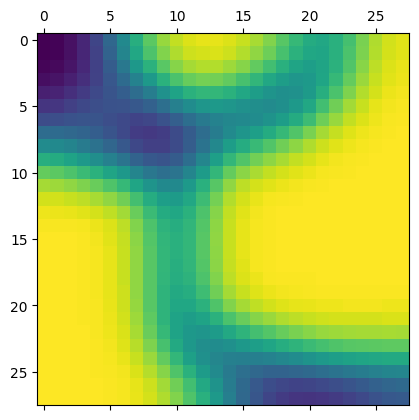

In [ ]:
import random
random_int = random.randint(0, 158)

arr = np.array(model.predict(X_Test_scaled[[random_int]]))
max_index = np.argmax(arr)
print("The Predicted number is: " + str(max_index))
print("The Actual number is: " + str(Y_Test[random_int]))
print("The test image is: ")
X_2d = X_Test[random_int].reshape(28,28)
plt.matshow(X_2d)